# Setup

[https://crucible.dreadnode.io/challenges/bear1](https://crucible.dreadnode.io/challenges/bear1)

In [99]:
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import sys
import os

notebook_path = os.getcwd()
sys.path.append(os.path.dirname(notebook_path))
load_dotenv()

CRUCIBLE_API_KEY = os.getenv("API_KEY")

### `Set Notebook Variables`


In [88]:
CHALLENGE = "bear1"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://bear1.crucible.dreadnode.io"
ARTIFACT_FILES = ['bear.csv']

# Step 1: Import the Data

In [89]:
df = pd.read_csv('../data/bear.csv')
df.head()

,tune,bear,val
0,22.552631,Kodiak,p
1,82.061124,Grizzly,g
2,94.895799,Black,Q
3,62.180388,Panda,a
4,41.193846,Black,L


# Step 2: Understanding the Data

### `Missing Values`

In [90]:
df.isnull().sum()

tune    0
bear    0
val     1
dtype: int64

In [91]:
df[df['val'].isnull()]

,tune,bear,val
8531,99.844511,Sun,NaN


### `Analyzing Categorical Data`

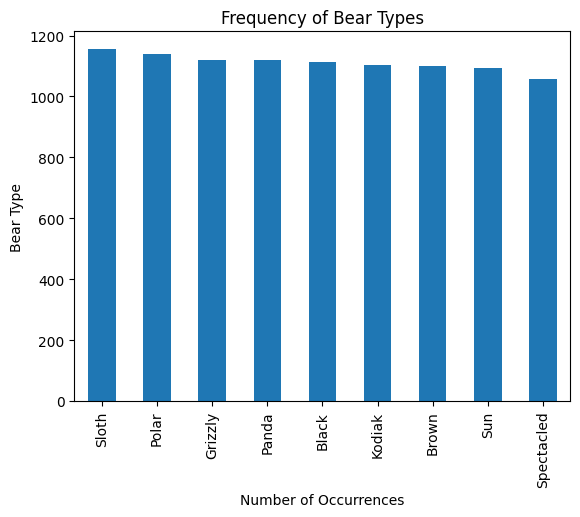

In [92]:
df['bear'].value_counts().plot(kind = "bar", title='Frequency of Bear Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Bear Type')
plt.show()

### `Exploring Text Data`

In [93]:
unique_values = df['val'].nunique()
unique_values

64

# Step 3: Solving the Challenge

In [94]:
bears = df.sort_values('tune', ascending=False).groupby('bear').head(1)
bears = bears.sort_values('bear', ascending=True)
print(bears)

           tune        bear  val
6718  99.974140       Black    {
2712  99.973701       Brown    B
4450  99.967065     Grizzly    A
5667  99.949576      Kodiak    M
2630  99.920626       Panda    B
2828  99.905925       Polar    O
1580  99.915939       Sloth    O
7160  99.975820  Spectacled    }
8531  99.844511         Sun  NaN


### `Decoding the Flag`

In [95]:
characters = list(top_bears['val'])
secret_word = ''.join(character for character in characters if type(character) == str)

In [96]:
secret_word = [c for c in secret_word if c not in ['{','}',' ']]
secret_word = ''.join(secret_word)

### `Submit Your Findings`

In [97]:
def query(input_data):
    response = requests.post(
        f"{ CHALLENGE_URL }/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": input_data}
    )
    return response.json()
response = query(secret_word)

In [98]:
def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)

flag = response['flag']
submit_flag(flag)

The flag was correct. Congrats!
